In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [6]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


In [7]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
5,5,30
6,6,33
7,7,38
8,8,45
9,9,56


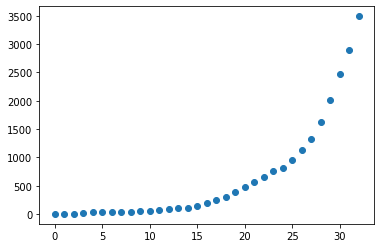

In [8]:

plt.scatter(data['days'], data['confirmed'])


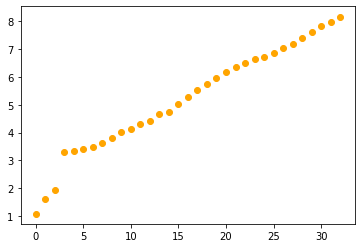

In [9]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [10]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

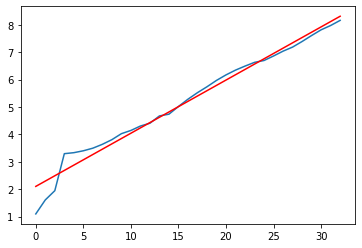

In [11]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

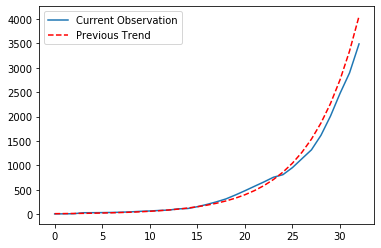

In [12]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [13]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9746712207078526

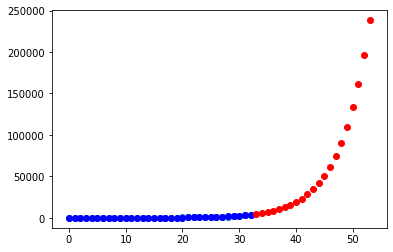

In [14]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [19]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53]),
 array([[  4925.99792652],
        [  5980.23064425],
        [  7260.0839651 ],
        [  8813.84386587],
        [ 10700.13020033],
        [ 12990.10829399],
        [ 15770.1738512 ],
        [ 19145.21247003],
        [ 23242.55673913],
        [ 28216.79020891],
        [ 34255.5794799 ],
        [ 41586.75444004],
        [ 50486.903772  ],
        [ 61291.81001991],
        [ 74409.11790672],
        [ 90333.71384951],
        [109666.39690683],
        [133136.54557103],
        [161629.63557237],
        [196220.64687957],
        [238214.62026744]]))

In [20]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


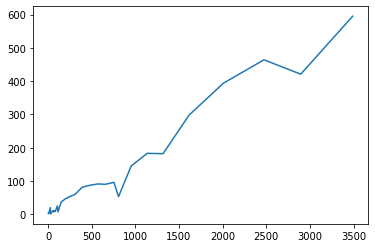

In [21]:
plt.plot(dt['confirmed'],dt['Infected'])